# Employee Attrition Prediction



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

0.15865525393145707 0.15865525393145707
2.0


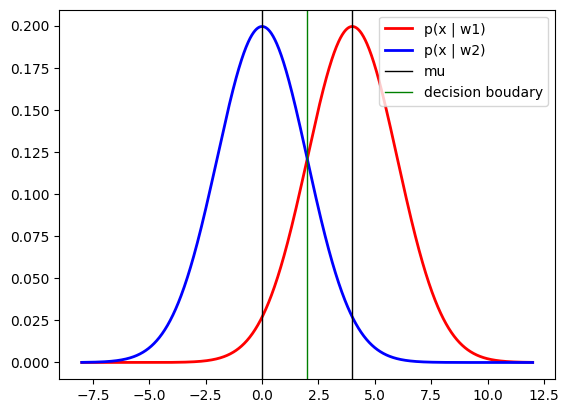

In [2]:
"""
T2
"""
from scipy.stats import norm
import math
rv1 = norm(4, 2)
rv2 = norm(0, 2)
x = np.linspace(-8, 12, 1000)
y = np.linspace(0, 0.2, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv1.pdf(x), color = 'r', lw=2, label='p(x | w1)')
ax.plot(x, rv2.pdf(x), color = 'b', lw=2, label='p(x | w2)')
plt.axvline(x = 0, color = 'black', lw=1, label = 'mu')
plt.axvline(x = 4, color = 'black', lw=1)
z = 0
for i in np.arange(0, 10, 0.1):
  if(math.isclose(1-rv2.cdf(i), rv1.cdf(i))):
    print(1-rv2.cdf(i), rv1.cdf(i))
    print(i)
    z = i
plt.axvline(x = z, color = 'g', lw=1, label = 'decision boudary')
plt.legend()

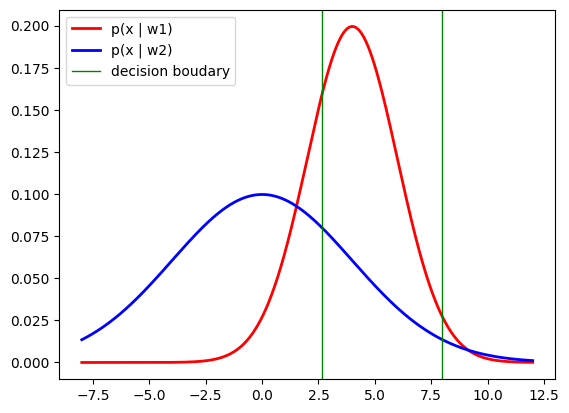

In [3]:
"""
OT3
"""
from scipy.stats import norm
import math
rv1 = norm(4, 2)
rv2 = norm(0, 4)
x = np.linspace(-8, 12, 1000)
y = np.linspace(0, 0.2, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv1.pdf(x), color = 'r', lw=2, label='p(x | w1)')
ax.plot(x, rv2.pdf(x), color = 'b', lw=2, label='p(x | w2)')
# plt.axvline(x = 0, color = 'black', lw=1, label = 'mu')
# plt.axvline(x = 4, color = 'black', lw=1)
z = 8/3
zz = 8
plt.axvline(x = z, color = 'g', lw=1, label = 'decision boudary')
plt.axvline(x = zz, color = 'g', lw=1)
plt.legend()

### read CSV

In [4]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

### Dataset statistic

In [5]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [6]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation

In [7]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
df_2 = df.copy()
for col in string_categorical_col:
  val = df_2[col].unique()
  for i in range(len(val)):
    df_2.loc[df_2[col] == val[i], col] = i
# print(df_2.info())
# HANDLE NULL NUMBERS
for col in df_2.columns:
  if(df_2[col].isna().sum() > 0):
    df_2[col] = df_2[col].fillna(df_2[col].median())

df_2 = df_2.loc[:, ~df_2.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

In [8]:
df_2.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   float64
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   float64
 12  JobLevel                  1470 non-null   float64
 13  JobRole                   1470 non-null   float64
 14  JobSatis

###  Spliting data into train and test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df_2.drop(['Attrition'], axis = 1)
y = df_2['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.1)

### Display histogram of each feature

In [12]:
def display_histogram(df, col_name, n_bin = 40):

    # INSERT CODE HERE
    train_col_no_nan = df[~np.isnan(df[col])]
    hist, bin_edge = np.histogram(train_col_no_nan[col_name], n_bin)
    print(len(hist[hist == 0]))
    plt.fill_between(bin_edge.repeat(2)[1 : -1], hist.repeat(2), facecolor = 'steelblue')
    plt.title(col_name +' '+ str(n_bin) + ' bins')
    plt.show()

In [13]:
def digitize(df, min, max, n_bin):
  df_digit = np.digitize(df, np.linspace(min, max, n_bin))
  bin = np.bincount(df_digit)
  print(bin)
  return df_digit

In [14]:
digitize(X_train['Age'], 0, 61,10)

[  0   0   0  18 121 248 588 191 113  44]


array([6, 8, 6, ..., 7, 6, 6])

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

0


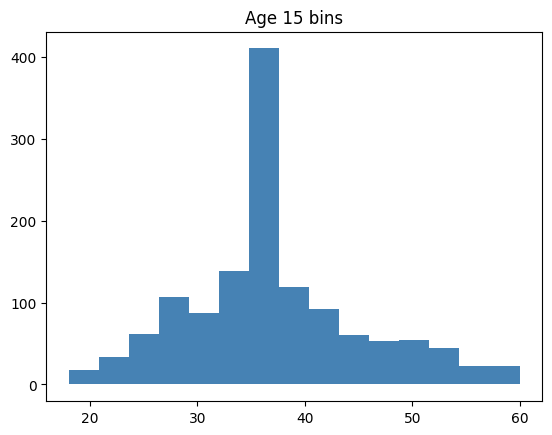

0


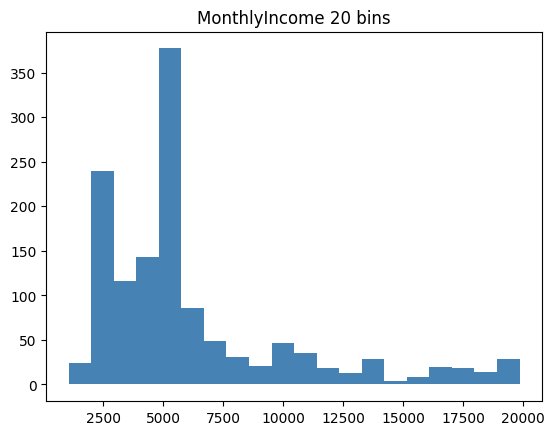

0


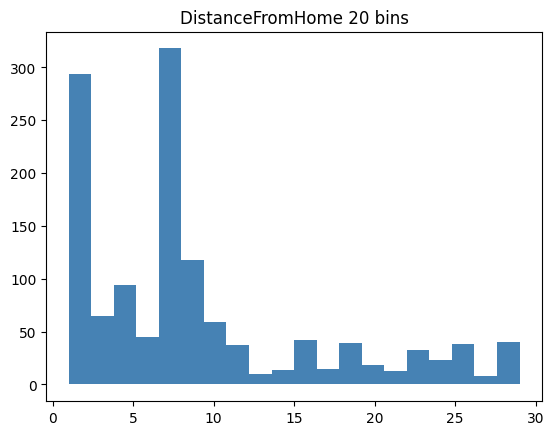

In [15]:
display_histogram(X_train, 'Age', 15)
display_histogram(X_train, 'MonthlyIncome', 20)
display_histogram(X_train, 'DistanceFromHome', 20)

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

0


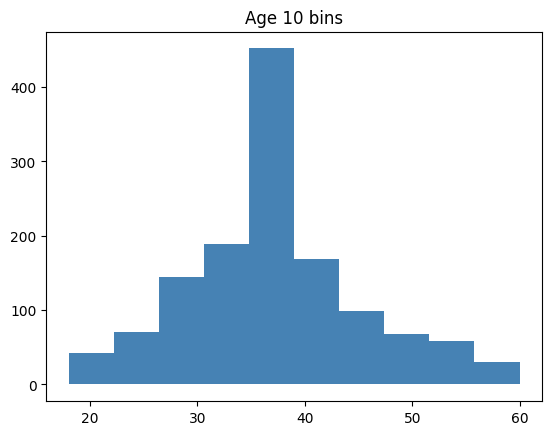

0


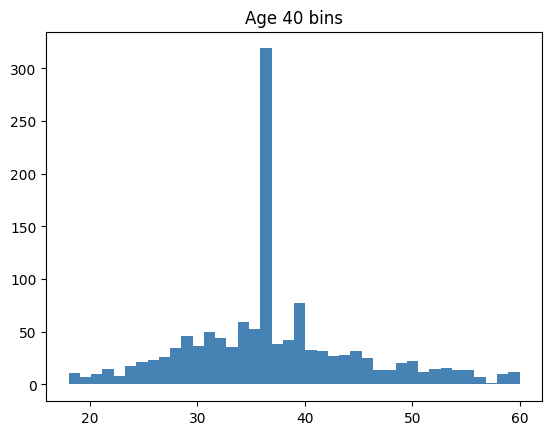

57


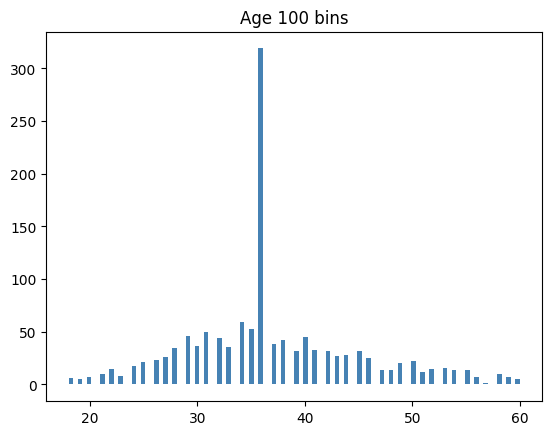

0


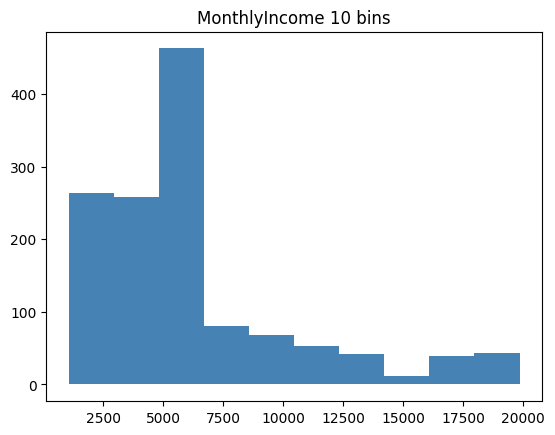

0


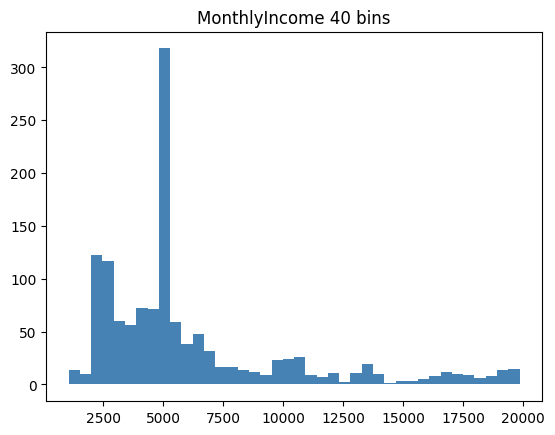

4


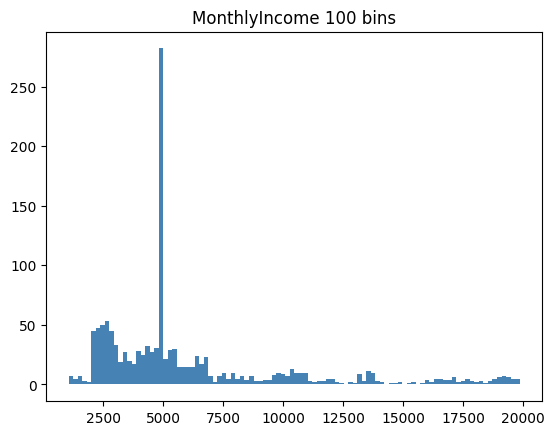

0


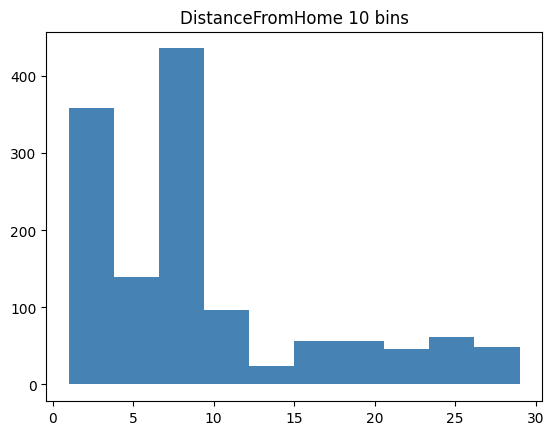

11


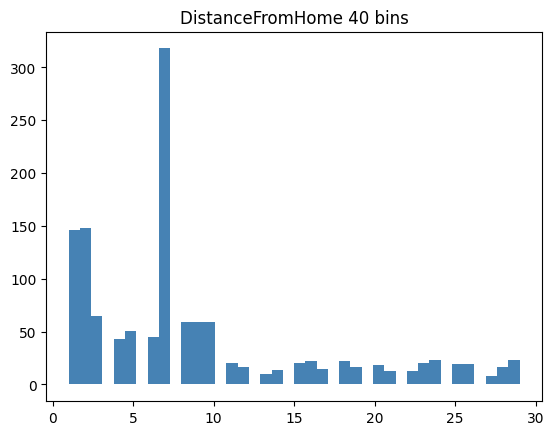

71


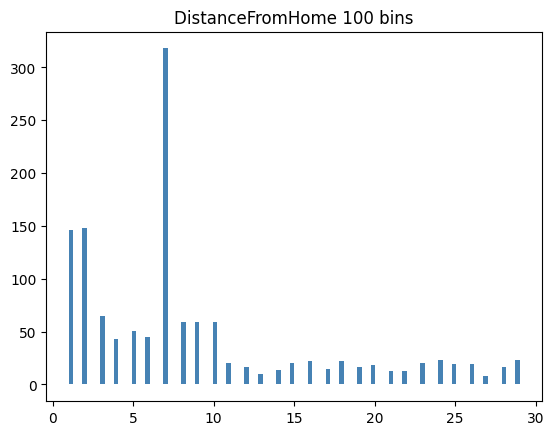

In [16]:
for e in (['Age', 'MonthlyIncome', 'DistanceFromHome']):
  display_histogram(X_train, e, 10)
  display_histogram(X_train, e, 40)
  display_histogram(X_train, e, 100)

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

0


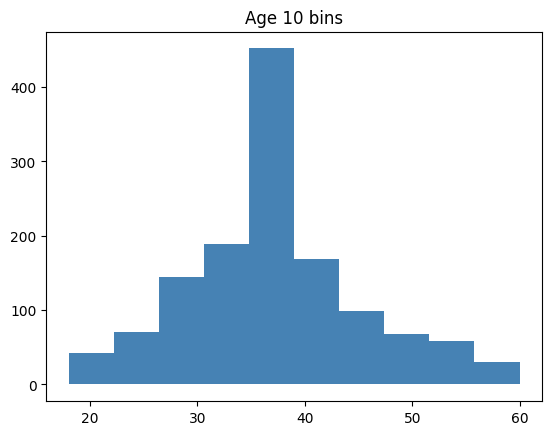

7


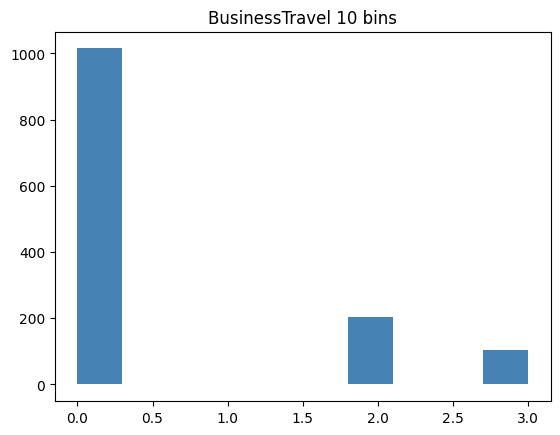

0


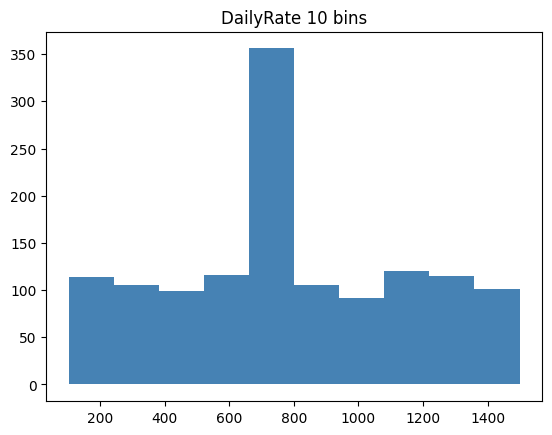

7


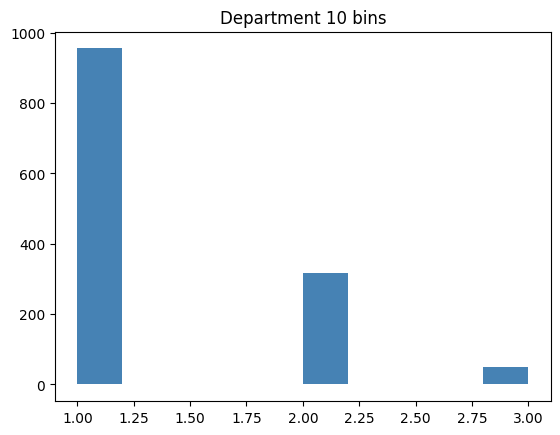

0


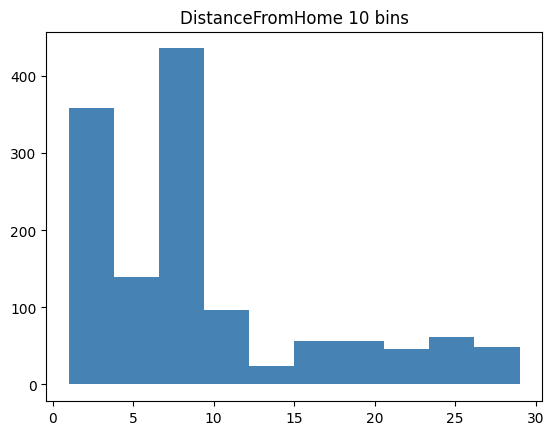

5


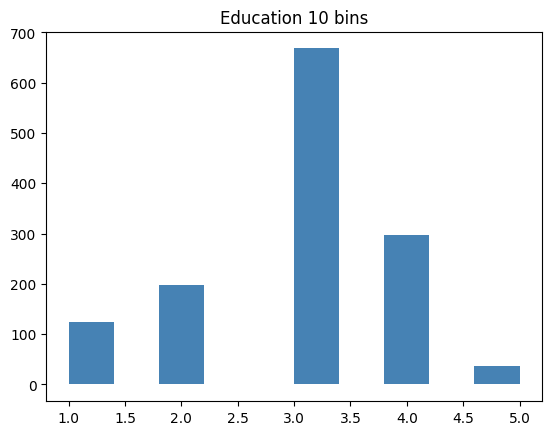

4


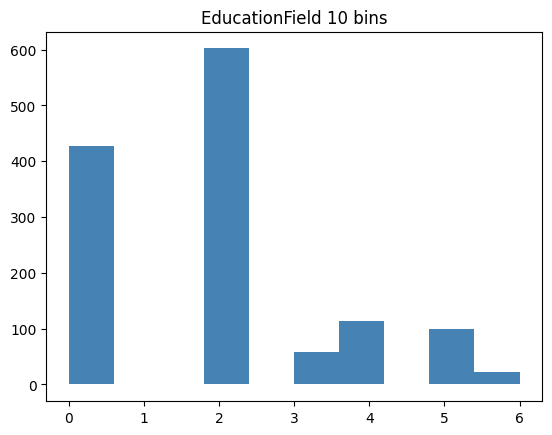

6


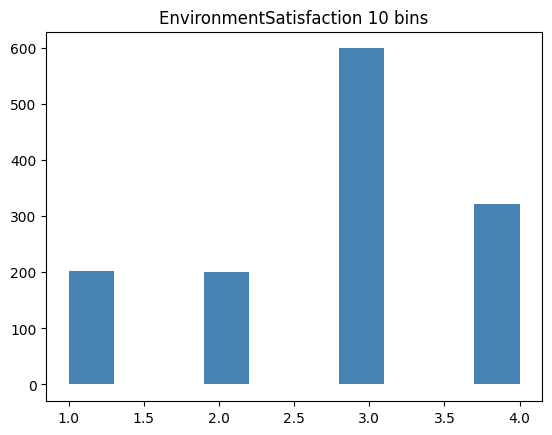

8


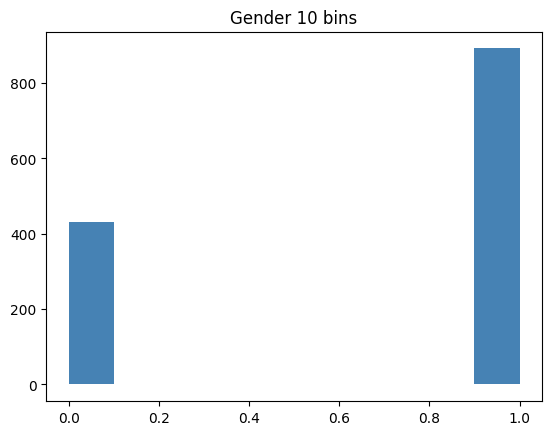

0


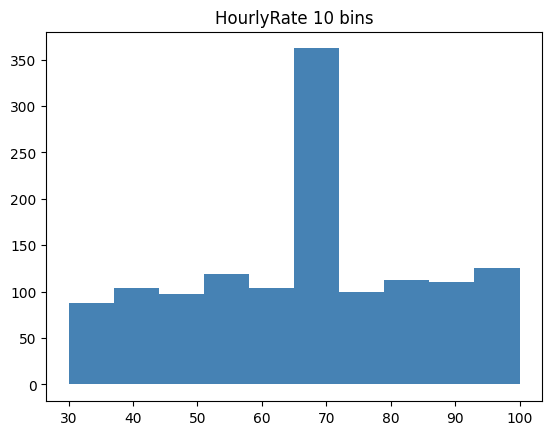

6


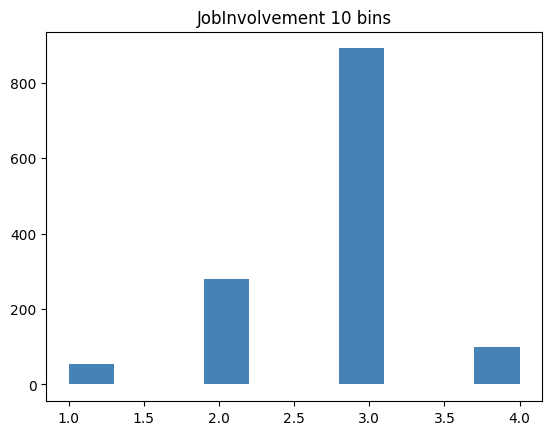

5


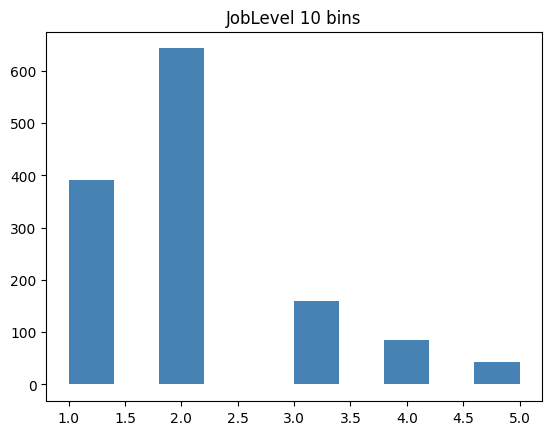

1


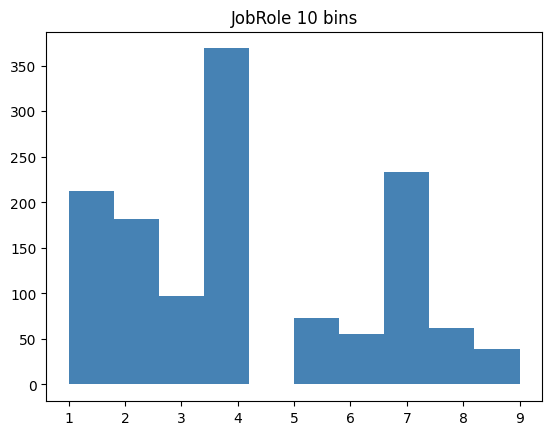

6


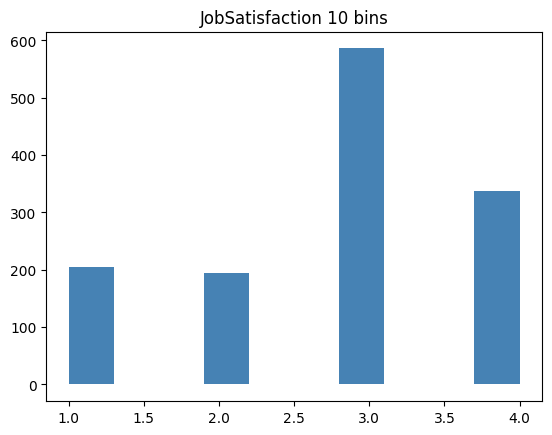

7


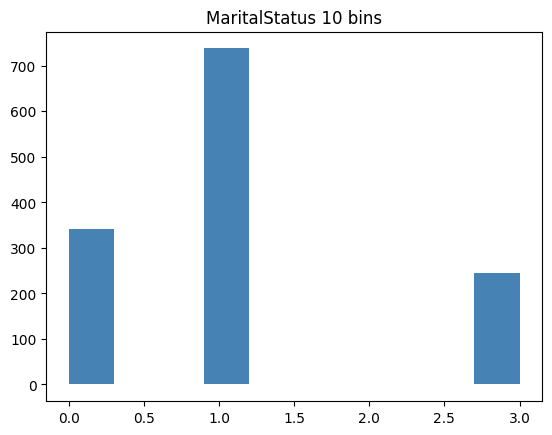

0


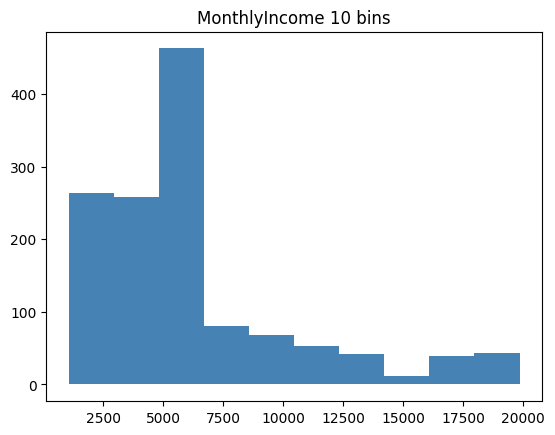

0


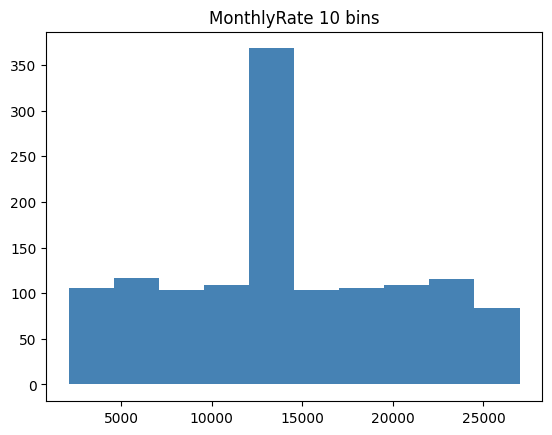

0


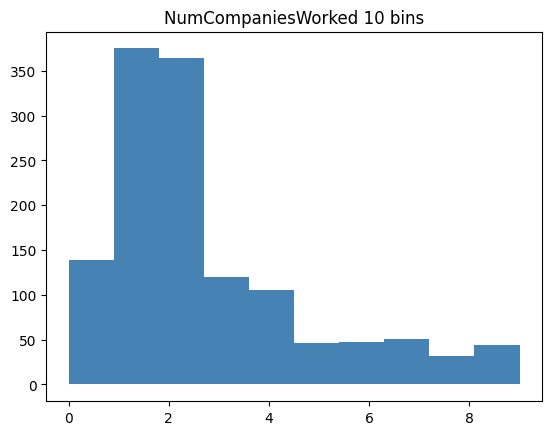

8


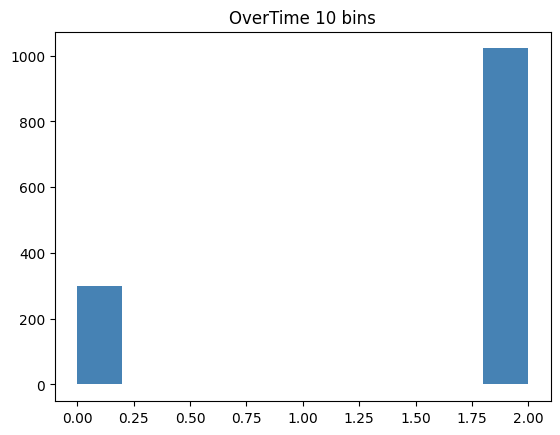

0


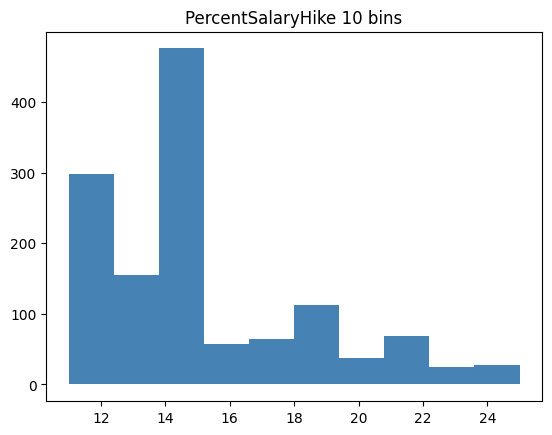

8


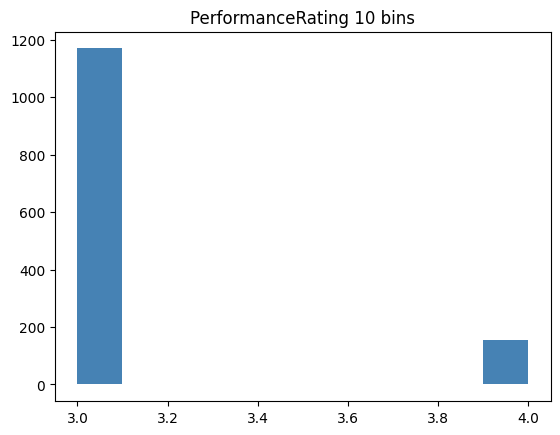

6


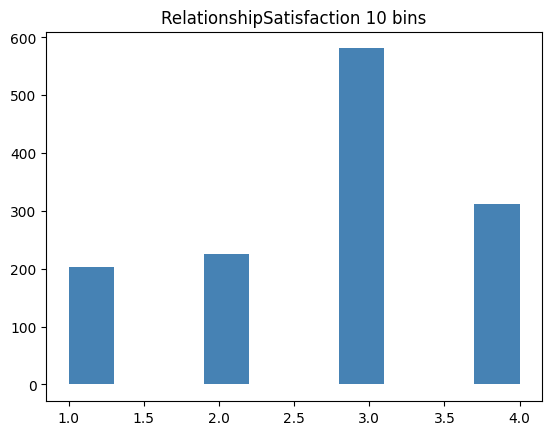

In [17]:
for col in X_train.columns[:22]:
  display_histogram(X_train, col, 10) #Age, TotalWorkingYears, YearsAtCompany, NumCompaniesWorked

In [18]:
X_train[['Age','TotalWorkingYears','YearsAtCompany','NumCompaniesWorked']].describe()

,Age,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked
count,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.951625,11.108088,6.701436,2.572940
std,8.097127,6.911125,5.465548,2.265593
min,18.000000,0.000000,0.000000,0.000000
25%,32.000000,7.000000,4.000000,1.000000
50%,36.000000,10.000000,5.000000,2.000000
75%,41.000000,13.000000,9.000000,3.000000
max,60.000000,40.000000,37.000000,9.000000


In [19]:
X_train['Age'] = digitize(X_train['Age'], 0, 60, 10)
X_train['TotalWorkingYears'] = digitize(X_train['TotalWorkingYears'], 0, 41, 10)
X_train['YearsAtCompany'] = digitize(X_train['YearsAtCompany'],0, 38, 10)
X_train['NumCompaniesWorked'] = digitize(X_train['NumCompaniesWorked'],0, 10, 10)

[  0   0   0  11 102 274 543 222 113  53   5]
[  0 151 370 489 128  76  54  28  24   3]
[  0 405 580 188  58  56  22   4   8   2]
[  0 514 364 120 105  46  47  51  32  44]


In [20]:
X_train[['Age','TotalWorkingYears','YearsAtCompany','NumCompaniesWorked']].describe()

,Age,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked
count,1323.000000,1323.000000,1323.000000,1323.000000
mean,6.087680,3.015117,2.179138,2.678005
std,1.230546,1.518344,1.267702,2.164706
min,3.000000,1.000000,1.000000,1.000000
25%,5.000000,2.000000,1.000000,1.000000
50%,6.000000,3.000000,2.000000,2.000000
75%,7.000000,3.000000,3.000000,3.000000
max,10.000000,9.000000,9.000000,9.000000


### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

In [21]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

0


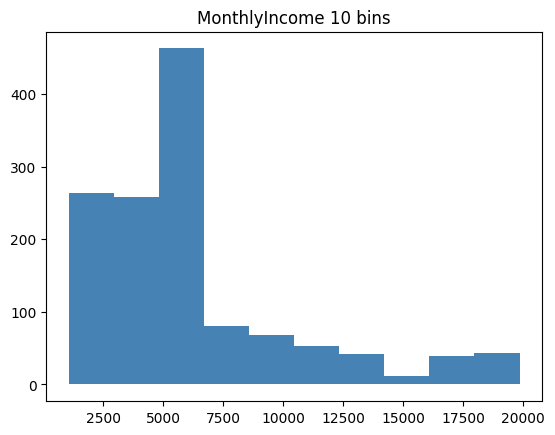

1


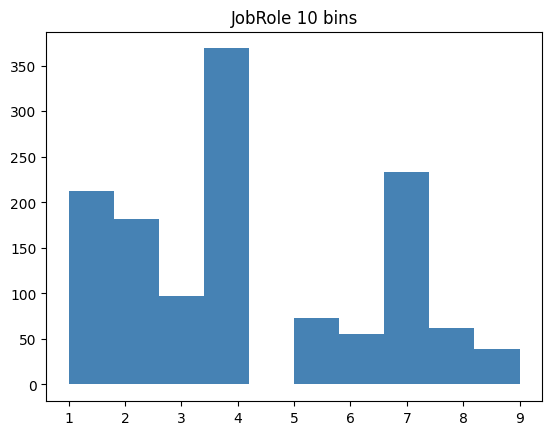

0


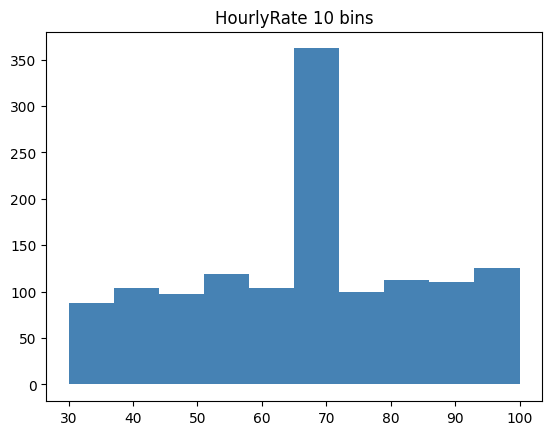

7


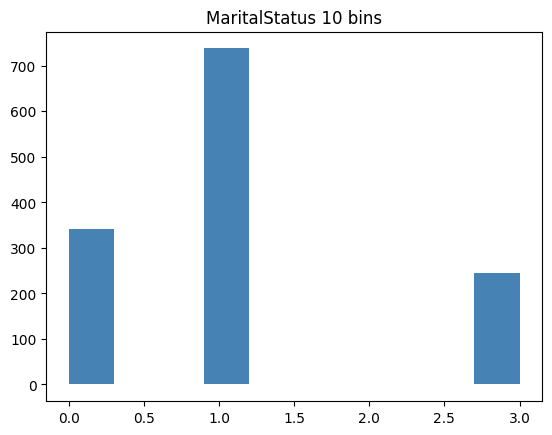

In [22]:
display_histogram(X_train,'MonthlyIncome',10)
display_histogram(X_train,'JobRole',10)
display_histogram(X_train,'HourlyRate',10)
display_histogram(X_train,'MaritalStatus',10)

In [23]:
import seaborn as sns

### T9. What is the prior distribution of the two classes?

### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [24]:
from scipy.stats import norm, binom
class NaiveBayes:
  def __init__(self, prior):
    self.prior = prior
    self.mu = [0, 0]
    self.seta = [0, 0]
  def cal_pdf(self,df, y, index):
    df_num = df.to_numpy()
    mu = np.mean(df_num[y == index], axis = 0)
    seta = np.std(df_num[y == index], axis = 0)
    self.mu[index] = mu
    self.seta[index] = seta
    pdf = norm.pdf(df_num, mu, seta)
    out = np.ones(pdf.shape)
    out[pdf != 0] = pdf[pdf != 0]
    return out
  def fit(self,df,y):
    n = len(df)
    pdf1 = np.prod(self.cal_pdf(df, y, 1), axis = 1)
    pdf2 = np.prod(self.cal_pdf(df, y, 0), axis = 1)
    ratio = binom.pmf( int(n * (1- self.prior)), n, 1 - self.prior) / binom.pmf( int(n * self.prior), n, self.prior)
    # print((pdf1 / pdf2))
    # print(ratio)
    y_pred =  ((pdf1 / pdf2) > ratio).astype(int)
    return y_pred
  def pred(self, df):
    n = len(df)
    df_num = df.to_numpy()
    pdf0 = np.prod(norm.pdf(df_num, self.mu[0], self.seta[0]), axis = 1)
    pdf1 = np.prod(norm.pdf(df_num, self.mu[1], self.seta[1]), axis = 1)
    ratio = binom.pmf( int(n * (1- self.prior)), n, 1 - self.prior) / binom.pmf( int(n * self.prior),n, self.prior)
    return ((pdf1 / pdf0) > ratio).astype(int)




In [25]:
def evaluate(y_true, y_pred, show_result = True):
  TP = sum( (y_pred[y_true == 1]).astype(int))
  FP = sum(y_pred[y_true == 0])
  FN = len(y_pred[y_true == 1]) - sum(y_pred[y_true == 1])
  TN = len(y_pred[y_true == 0]) - sum((y_pred[y_true == 0]).astype(int))
  accuracy = (TP + TN) / len(y_true)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  F1 = 2*precision*recall / (precision + recall)
  fpr = FP / (TN + FP)
  if(show_result):
    print(np.array([[TP,FP],
                    [FN,TN]]))
  return accuracy, precision, recall, F1, fpr

In [ ]:
# test evaluate
np.random.seed(21)
y_true = np.random.randint(2, size = 10)
y_pred = np.random.randint(2, size = 10)
print(evaluate(y_true, y_pred))

[[3 3]
 [0 4]]
(0.7, 0.5, 1.0, 0.6666666666666666, 0.42857142857142855)


In [ ]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
cols = ['Age','YearsAtCompany','NumCompaniesWorked','MonthlyIncome', 'DistanceFromHome', 'MaritalStatus', 'WorkLifeBalance', 'YearsSinceLastPromotion']

In [ ]:
# train model
'''
The total separations rate of U.S. jobs is 47.2 percent as of 2021,
according to the U.S. Bureau of Labor Statistics.
This estimate represents all turnover — voluntary and involuntary.
'''
model = NaiveBayes(0.472)
y_pred = model.fit(X_train, y_train)
print(evaluate(y_train, y_pred))

[[633  49]
 [477 164]]
(0.6024187452758881, 0.9281524926686217, 0.5702702702702702, 0.7064732142857143, 0.2300469483568075)


In [ ]:
vars(model)

{'prior': 0.472,
 'mu': [array([5.60563380e+00, 5.91549296e-01, 7.89208920e+02, 1.39436620e+00,
         1.03896714e+01, 2.84507042e+00, 2.19718310e+00, 2.63380282e+00,
         6.99530516e-01, 6.43990610e+01, 2.60093897e+00, 1.67605634e+00,
         4.29107981e+00, 2.64788732e+00, 7.98122066e-01, 4.65465962e+03,
         1.42049108e+04, 2.95305164e+00, 1.16431925e+00, 1.49342723e+01,
         3.13145540e+00, 2.62910798e+00, 5.86854460e-01, 2.52582160e+00,
         2.71361502e+00, 2.75117371e+00, 1.86854460e+00, 3.13145540e+00,
         1.78873239e+00, 2.92018779e+00]),
  array([6.16306306e+00, 5.27027027e-01, 8.09518468e+02, 1.28648649e+00,
         8.52162162e+00, 2.95045045e+00, 1.76756757e+00, 2.81081081e+00,
         6.63963964e-01, 6.58909910e+01, 2.80090090e+00, 2.13243243e+00,
         4.11621622e+00, 2.82882883e+00, 1.14954955e+00, 6.45693919e+03,
         1.41251396e+04, 2.63963964e+00, 1.61801802e+00, 1.50450450e+01,
         3.12252252e+00, 2.76306306e+00, 8.39639640e-01, 3

### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [ ]:
data_test = X_test.copy()
data_test['Age'] = digitize(data_test['Age'], 0, 60, 10)
data_test['TotalWorkingYears'] = digitize(data_test['TotalWorkingYears'], 0, 41, 10)
data_test['YearsAtCompany'] = digitize(data_test['YearsAtCompany'],0, 38, 10)
data_test['NumCompaniesWorked'] = digitize(data_test['NumCompaniesWorked'],0, 10, 10)

[ 0  0  0  0 11 32 56 25 14  9]
[ 0 18 37 62 12  5  8  3  1  1]
[ 0 51 67 17  3  7  2]
[ 0 59 39 15 10  6  3  3  6  6]


In [ ]:
y_pred = model.pred(data_test)

In [ ]:
evaluate(y_test, y_pred)

[[63  8]
 [60 16]]


(0.5374149659863946,
 0.8873239436619719,
 0.5121951219512195,
 0.6494845360824741,
 0.3333333333333333)

### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [ ]:
np.random.seed(788)
y_baseline = np.random.choice(2, len(y_test), p=[0.5, 0.5])
y_baseline

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
evaluate(y_test, y_baseline)

[[58 16]
 [65  8]]


(0.4489795918367347,
 0.7837837837837838,
 0.4715447154471545,
 0.5888324873096447,
 0.6666666666666666)

### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



In [ ]:
np.random.seed(69)
y_baseline = np.random.choice(2, len(y_train), p=[0.5, 0.5])
y_baseline

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
evaluate(y_train, y_baseline)

[[531  98]
 [579 115]]


(0.48828420256991684,
 0.8441971383147854,
 0.4783783783783784,
 0.6106958021851638,
 0.460093896713615)

### T15. Compare the two baselines with your Naive Bayes classifier.


### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [ ]:
from scipy.stats import norm, binom
class NaiveBayesWithThreshold:
  def __init__(self, t):
    self.mu = [0, 0]
    self.seta = [0, 0]
    self.t = t
  def cal_pdf(self,df, y, index):
    df_num = df.to_numpy()
    mu = np.mean(df_num[y == index], axis = 0)
    seta = np.std(df_num[y == index], axis = 0)
    self.mu[index] = mu
    self.seta[index] = seta
    pdf = norm.pdf(df_num, mu, seta)
    out = np.ones(pdf.shape)
    out[pdf != 0] = pdf[pdf != 0]
    return out
  def fit(self,df,y):
    n = len(df)
    pdf1 = np.prod(self.cal_pdf(df, y, 1), axis = 1)
    pdf2 = np.prod(self.cal_pdf(df, y, 0), axis = 1)
    # print((pdf1 / pdf2))
    # print(ratio)
    y_pred =  ((pdf1 / pdf2) > self.t).astype(int)
    return y_pred
  def pred(self, df):
    n = len(df)
    df_num = df.to_numpy()
    pdf0 = np.prod(norm.pdf(df_num, self.mu[0], self.seta[0]), axis = 1)
    pdf1 = np.prod(norm.pdf(df_num, self.mu[1], self.seta[1]), axis = 1)
    return ((pdf1 / pdf0) > self.t).astype(int)

In [ ]:
ts = np.arange(-5, 5, 0.05)
t_max = [0, 0, 0, 0, 0]
eval_max = [0, 0, 0, 0, 0] # Accuracy, Precision, Recall, F1, fpr
for t in ts:
  model_w_t = NaiveBayesWithThreshold(t)
  y_pred = model_w_t.fit(X_train, y_train)
  eval = evaluate(y_train, y_pred)
  print(eval)
  for i in range(len(eval)):
    if(eval[i] > eval_max[i]):
      t_max[i] = t
      eval_max[i] = eval[i]

[[1110  213]
 [   0    0]]
(0.8390022675736961, 0.8390022675736961, 1.0, 0.9124537607891492, 1.0)
[[1110  213]
 [   0    0]]
(0.8390022675736961, 0.8390022675736961, 1.0, 0.9124537607891492, 1.0)
[[1110  213]
 [   0    0]]
(0.8390022675736961, 0.8390022675736961, 1.0, 0.9124537607891492, 1.0)
[[1110  213]
 [   0    0]]
(0.8390022675736961, 0.8390022675736961, 1.0, 0.9124537607891492, 1.0)
[[1110  213]
 [   0    0]]
(0.8390022675736961, 0.8390022675736961, 1.0, 0.9124537607891492, 1.0)
[[1110  213]
 [   0    0]]
(0.8390022675736961, 0.8390022675736961, 1.0, 0.9124537607891492, 1.0)
[[1110  213]
 [   0    0]]
(0.8390022675736961, 0.8390022675736961, 1.0, 0.9124537607891492, 1.0)
[[1110  213]
 [   0    0]]
(0.8390022675736961, 0.8390022675736961, 1.0, 0.9124537607891492, 1.0)
[[1110  213]
 [   0    0]]
(0.8390022675736961, 0.8390022675736961, 1.0, 0.9124537607891492, 1.0)
[[1110  213]
 [   0    0]]
(0.8390022675736961, 0.8390022675736961, 1.0, 0.9124537607891492, 1.0)
[[1110  213]
 [   0 

In [ ]:
print(t_max)
print(eval_max)

[0.04999999999998206, 4.949999999999964, -5.0, 0.04999999999998206, -5.0]
[0.8578987150415722, 0.947242206235012, 1.0, 0.9183318853171155, 1.0]


### T17. Plot the RoC of your classifier.

In [ ]:
ts = np.arange(-5, 5, 0.05)
recall = []
fpr = []
for t in ts:
  model_w_t = NaiveBayesWithThreshold(t)
  y_pred = model_w_t.fit(X_train, y_train)
  eval = evaluate(y_train, y_pred) # Accuracy, Precision, Recall, F1, fpr
  recall.append(eval[2])
  fpr.append(eval[4])

In [ ]:
ts = np.arange(-5, 5, 0.05)
recall2 = []
fpr2 = []
for t in ts:
  model_w_t = NaiveBayesWithThreshold(t)
  y_pred = model_w_t.fit(X_train, y_train)
  eval = evaluate(y_train, y_pred) # Accuracy, Precision, Recall, F1, fpr
  recall2.append(eval[2])
  fpr2.append(eval[4])

Text(0, 0.5, 'FPR')

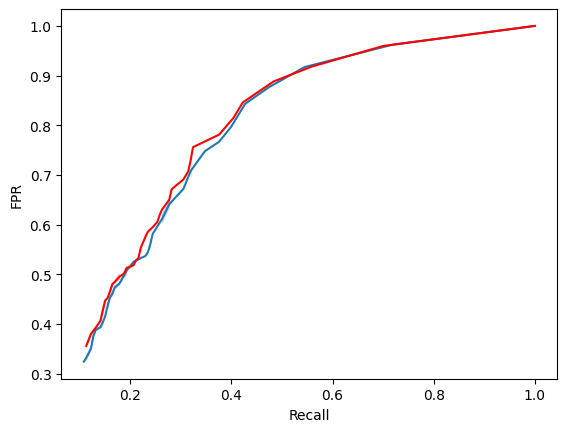

In [ ]:
import seaborn as sns
sns.lineplot(x = fpr, y = recall) #bin 5
sns.lineplot(x = fpr2, y = recall2, color = 'r') #bin10
plt.xlabel('Recall')
plt.ylabel('FPR')

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.


In [ ]:
# discretization same feature
X_train['Age'] = digitize(X_train['Age'], 0, 60, 5)
X_train['TotalWorkingYears'] = digitize(X_train['TotalWorkingYears'], 0, 41, 5)
X_train['YearsAtCompany'] = digitize(X_train['YearsAtCompany'],0, 38, 5)
X_train['NumCompaniesWorked'] = digitize(X_train['NumCompaniesWorked'],0, 10, 5)

[  0   0 222 870 226   5]
[  0 936 238 118  31]
[   0 1046  200   65   12]
[  0 878 221 146  78]


In [ ]:
# train model
'''
The total separations rate of U.S. jobs is 47.2 percent as of 2021,
according to the U.S. Bureau of Labor Statistics.
This estimate represents all turnover — voluntary and involuntary.
'''
model = NaiveBayes(0.472)
y_pred = model.fit(X_train, y_train)
print(evaluate(y_train, y_pred))

[[604  50]
 [506 163]]
(0.5797430083144369, 0.9235474006116208, 0.5441441441441441, 0.6848072562358277, 0.2347417840375587)


In [26]:
'''
OT 4
'''
accuracy = []
np.random.seed(34)
for _ in range(10):
  X = df_2.drop(['Attrition'], axis = 1)
  y = df_2['Attrition']
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.1)
  #digitize
  X_train['Age'] = digitize(X_train['Age'], 0, 60, 10)
  X_train['TotalWorkingYears'] = digitize(X_train['TotalWorkingYears'], 0, 41, 10)
  X_train['YearsAtCompany'] = digitize(X_train['YearsAtCompany'],0, 38, 10)
  X_train['NumCompaniesWorked'] = digitize(X_train['NumCompaniesWorked'],0, 10, 10)
  #train
  '''
  The total separations rate of U.S. jobs is 47.2 percent as of 2021,
  according to the U.S. Bureau of Labor Statistics.
  This estimate represents all turnover — voluntary and involuntary.
  '''
  model = NaiveBayes(0.472)
  y_pred = model.fit(X_train, y_train)
  #evaluate
  data_test = X_test.copy()
  data_test['Age'] = digitize(data_test['Age'], 0, 60, 10)
  data_test['TotalWorkingYears'] = digitize(data_test['TotalWorkingYears'], 0, 41, 10)
  data_test['YearsAtCompany'] = digitize(data_test['YearsAtCompany'],0, 38, 10)
  data_test['NumCompaniesWorked'] = digitize(data_test['NumCompaniesWorked'],0, 10, 10)
  y_pred = model.pred(data_test)
  eval = evaluate(y_test, y_pred,False)
  print(eval)
  accuracy.append(eval[0])
print(np.mean(accuracy))
print(np.std(accuracy))

[  0   0   0  12 100 282 537 209 117  61   5]
[  0 150 368 502 122  71  51  31  23   5]
[  0 411 588 184  53  53  16   6   8   4]
[  0 489 377 121 109  48  50  52  33  44]
[ 0  0  0  2 13 33 59 26  8  6]
[ 0 27 39 46 13  9  7  3  3]
[ 0 46 59 19  8  6  8  0  1]
[ 0 75 34 11  8  2  3  6  4  4]
(0.5578231292517006, 0.9142857142857143, 0.5203252032520326, 0.6632124352331606, 0.25)
[  0   0   0  12  99 282 541 209 113  62   5]
[  0 155 371 498 118  72  52  31  22   4]
[  0 405 589 181  58  53  20   6   8   3]
[  0 506 372 121 108  47  47  52  29  41]
[ 0  0  0  2 14 33 55 26 12  5]
[ 0 22 36 50 17  8  6  3  4  1]
[ 0 52 58 22  3  6  4  0  1  1]
[ 0 58 39 11  9  3  6  6  8  7]
(0.54421768707483, 0.9117647058823529, 0.5040650406504065, 0.6492146596858638, 0.25)
[  0   0   0  13 105 285 532 216 110  58   4]
[  0 163 366 500 124  66  53  29  17   5]
[  0 415 587 184  55  48  20   3   7   4]
[  0 511 362 124 103  46  47  54  33  43]
[ 0  0  0  1  8 30 64 19 15  9  1]
[ 0 14 41 48 11 14  5  5  9